In [1]:
library(tidyverse)
library(DESeq2)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’

In [2]:
setwd('/home/wpy/stereoseq/20240502-SPACseq')
df <- read.csv('./RNA/Group_sgCd44_vs_sginter_DESeq2.txt', sep="\t")

In [2]:
setwd('/home/wpy/stereoseq/20240502-SPACseq')
df <- read.csv('./RNA/Group_sgCd44_vs_sginter_DESeq2.2.txt', sep='\t')

In [3]:
options(repr.plot.width = 5, repr.plot.height = 5)

Warning message:
“Removed 41831 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 41831 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 136 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


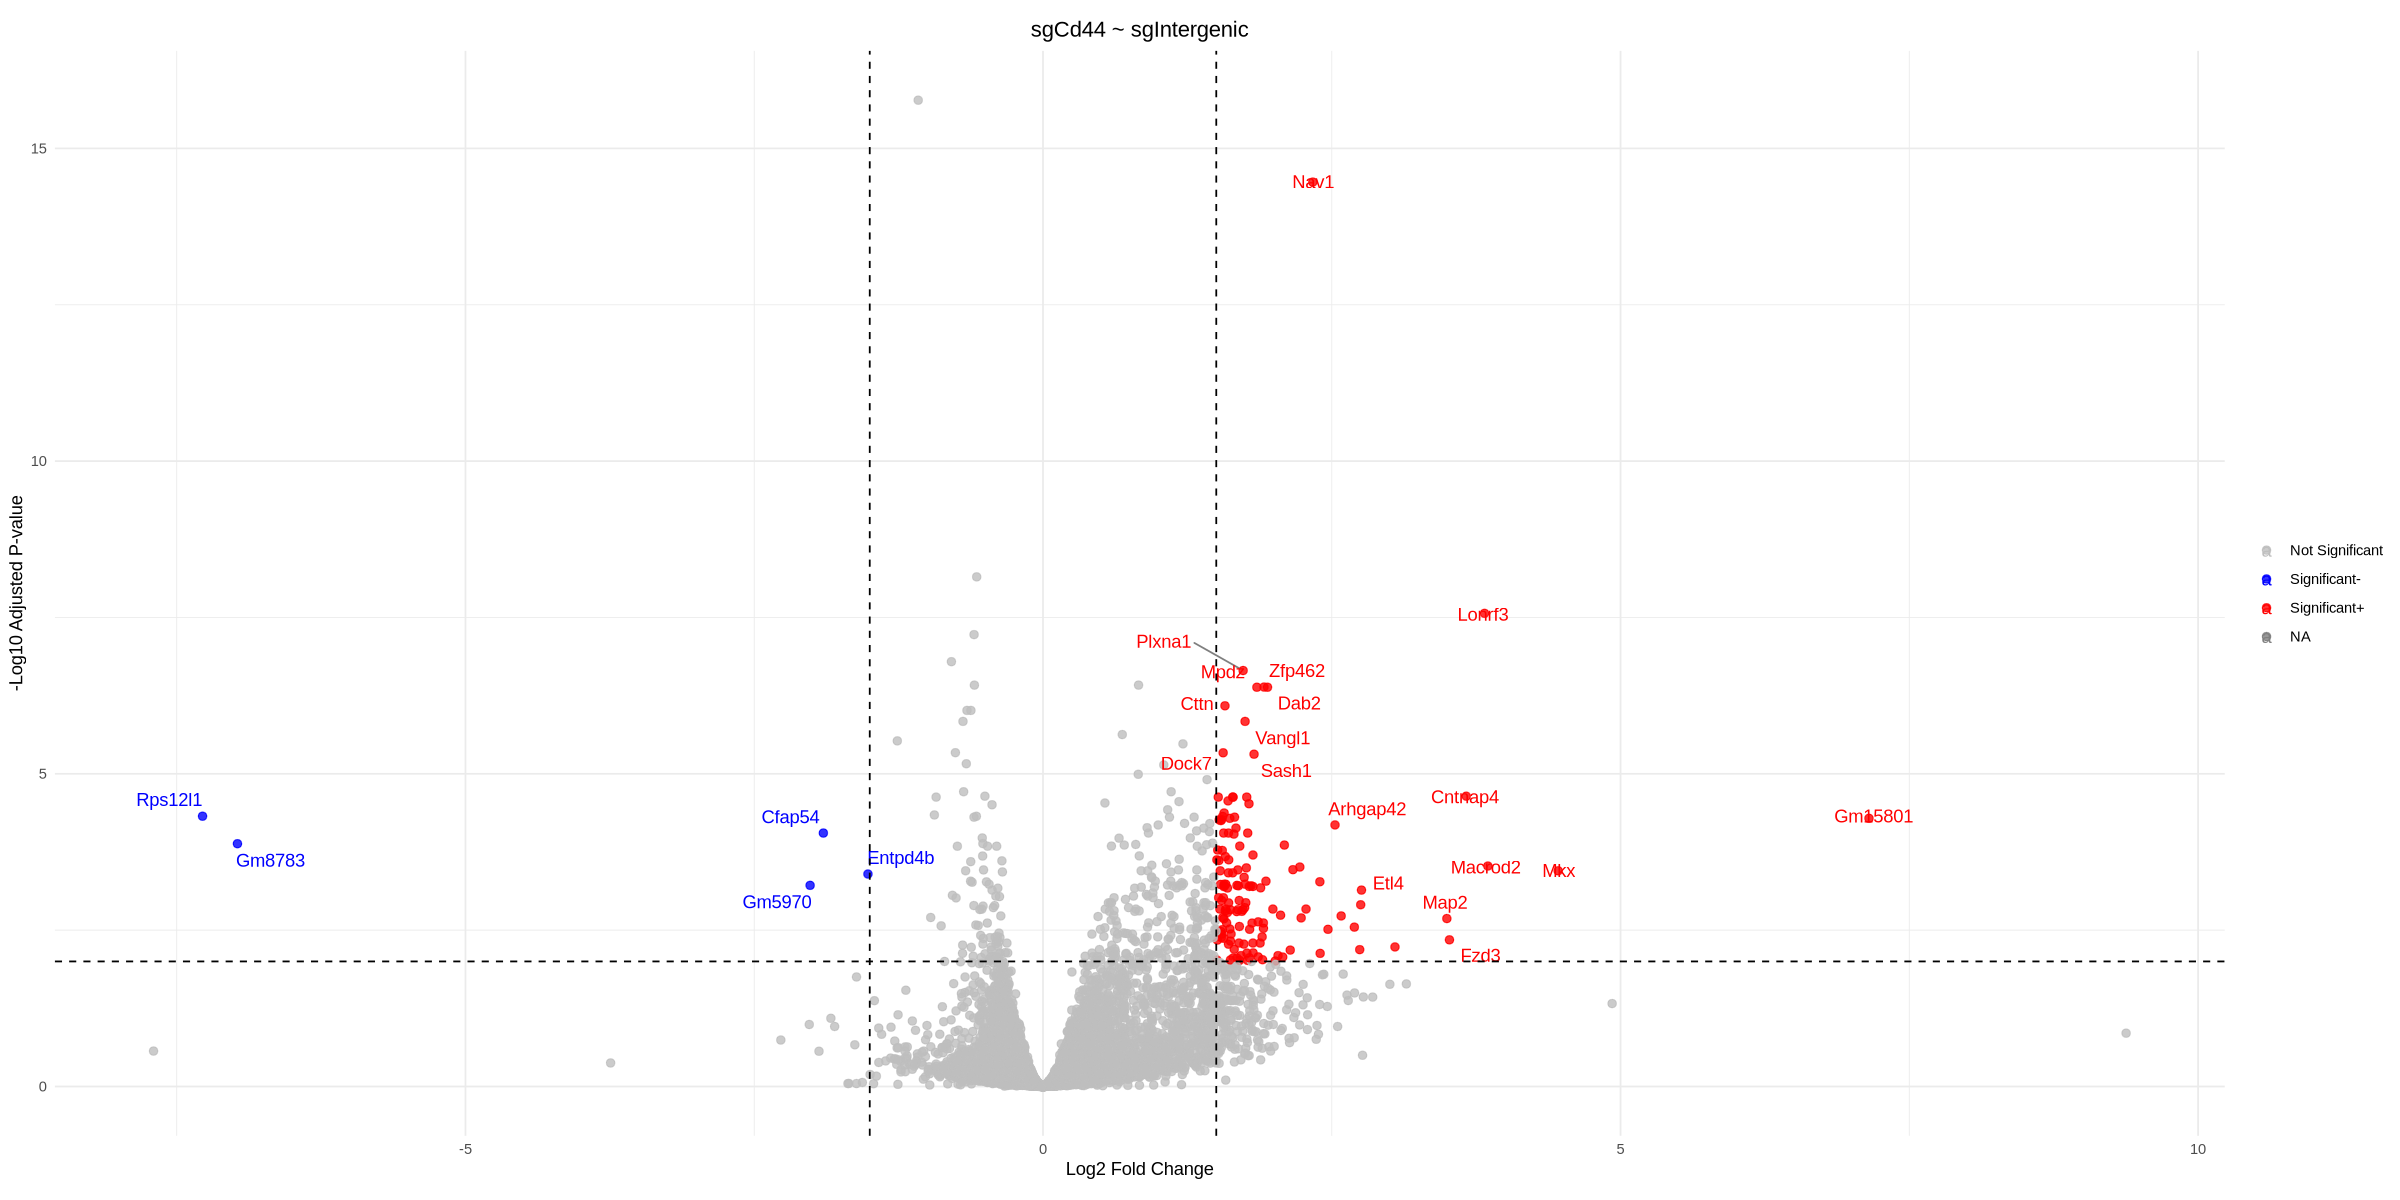

In [7]:
padj_threshold <- 0.01
log2FC_threshold <- 1.5

df <- df %>%
  mutate(significance = ifelse(padj > padj_threshold | abs(log2FoldChange) <= log2FC_threshold, "Not Significant", ifelse(log2FoldChange > log2FC_threshold, "Significant+", "Significant-")))

volcano_plot <- ggplot(df, aes(x = log2FoldChange, y = -log10(padj), color = significance, label = ifelse(significance == "Significant+" | significance == "Significant-", Gene_name, ""))) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("Significant+" = "red", "Not Significant" = "grey", 'Significant-' = "blue")) +
  theme_minimal() +
  labs(
    title = "sgCd44 ~ sgIntergenic",
    x = "Log2 Fold Change",
    y = "-Log10 Adjusted P-value"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.title = element_blank()
  ) +
  geom_text_repel(
    aes(label = ifelse(significance == "Significant+" | significance == "Significant-", as.character(Gene_name), "")),
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines"),
    segment.color = 'grey50'
  ) +
  geom_hline(yintercept = -log10(padj_threshold), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(-log2FC_threshold, log2FC_threshold), linetype = "dashed", color = "black")

volcano_plot <- volcano_plot + theme(
  aspect.ratio = 0.5
)

print(volcano_plot)


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in transformation$transform(coord_limits):
“NaNs produced”
Warning message:
“Removed 33108 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 37438 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 512 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


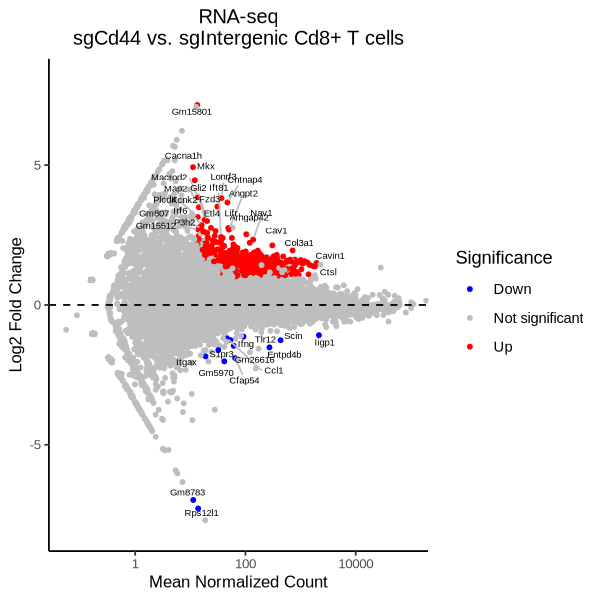

In [101]:
library(ggplot2)
library(ggrepel)

# 假设数据框 'cdf' 包含三个列：log2FoldChange, meanNormalizedCounts, significance
# significance 列可以是 'Up', 'Down', 'Ns' 用来标记上下调基因和不显著基因

# 示例数据生成
set.seed(123)
log2FC_threshold <- 1
padj_threshold <- 0.1

setwd('/home/wpy/stereoseq/20240502-SPACseq')
df <- read.csv('./RNA/Group_sgCd44_vs_sginter_DESeq2.2.txt', sep='\t')
# cdf <- df %>% drop_na()
cdf <- df %>%
  mutate(significance = ifelse(padj > padj_threshold | abs(log2FoldChange) <= log2FC_threshold | log2FoldChange == 0, "Not Significant", ifelse(log2FoldChange > log2FC_threshold, "Up", "Down")))

# 设置点颜色
cdf$color <- ifelse(is.na(cdf$significance), 'Not significant', ifelse(cdf$significance == "Up", "Up", 
                   ifelse(cdf$significance == "Down", "Down", "Not significant")))

# 绘制火山图
p <- ggplot(cdf, aes(x = baseMean, y = log2FoldChange)) +
  geom_point(aes(color = color), size = 1) +
  scale_x_log10() +  # X轴用对数显示
  scale_color_manual(values = c("Not significant" = "grey", "Up" = "red", "Down" = "blue")) +  # 颜色定义
  theme_classic() +
  labs(
    title = "RNA-seq\nsgCd44 vs. sgIntergenic Cd8+ T cells",
    x = "Mean Normalized Count",
    y = "Log2 Fold Change",
    color = "Significance"
  ) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +  # 加入y=0的虚线
  # 添加 y = 1/x 和 y = -1/x 的虚线
  # geom_function(fun = function(x) 100/(x+100) + 1, linetype = "dashed", color = "black") +
  # geom_function(fun = function(x) -100/(x+100) - 1, linetype = "dashed", color = "black") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 12),  # 标题样式
    axis.title = element_text(size = 10),  # 轴标题大小
    axis.text = element_text(size = 8)  # 坐标轴标签大小
  ) +
  
  # 显示更多的文本标签
  geom_text_repel(
    aes(label = ifelse(significance == "Up" | significance == "Down", as.character(Gene_name), "")),
    size = 2,
    box.padding = unit(0.1, "lines"),
    point.padding = unit(0.1, "lines"),
    max.overlaps = 50,  # 显示更多标签
    segment.color = 'grey'
  ) +
  coord_cartesian(xlim = c(-1, 1e5), ylim = c(-8, 8))

# 打印图
print(p)


In [3]:
library(clusterProfiler)
library(org.Mm.eg.db)
library(DOSE)
library(AnnotationDbi)



clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:clusterProfiler’:

    select


The following object is masked from ‘package:dplyr’:

    select




DOSE v3.28.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you u

In [39]:
padj_threshold <- 0.01
log2FC_threshold <- 5

df <- df %>%
  mutate(significance = ifelse(padj > padj_threshold | abs(log2FoldChange) <= log2FC_threshold, "Not Significant", ifelse(log2FoldChange > log2FC_threshold, "Significant+", "Significant-")))

df <- read.csv('./RNA/Group_sgCd44_vs_sginter_DESeq2.txt', sep="\t")
df$entrez <- mapIds(org.Mm.eg.db, keys = df$Gene_name, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
df <- na.omit(df)

gene_list <- df$log2FoldChange
names(gene_list) <- df$entrez
gene_list <- sort(gene_list, decreasing=TRUE)
length(gene_list)

gsea_results <- gseGO(geneList = gene_list, OrgDb = org.Mm.eg.db, ont="ALL", nPerm = 1000, minGSSize = 10, maxGSSize = 500, pvalueCutoff = 0.05, verbose = TRUE)

'select()' returned 1:1 mapping between keys and columns



[1] 12731

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in fgseaSimple(pathways = pathways, stats = stats, minSize = minSize, :
“There were 9 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
leading edge analysis...

done...



In [38]:
# 加载库
library(clusterProfiler)
library(org.Mm.eg.db)  # 替换为你的物种数据库
library(enrichplot)
library(pheatmap)

# 假设 df 是你的数据，包含 Gene_name 和 log2FoldChange
# 首先，准备一个排序的基因列表
padj_threshold <- 0.01
log2FC_threshold <- 1
df <- df %>%
  mutate(significance = ifelse(padj > padj_threshold | abs(log2FoldChange) <= log2FC_threshold, "Not Significant", ifelse(log2FoldChange > log2FC_threshold, "Significant+", "Significant-")))

cdf <- df[df$significance == 'Significant+', ]
cdf$entrez <- mapIds(org.Mm.eg.db, keys = cdf$Gene_name, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
cdf <- na.omit(cdf)
gene_list <- cdf$log2FoldChange
names(gene_list) <- cdf$entrez
gene_list <- sort(gene_list, decreasing=TRUE)

# 使用 clusterProfiler 进行 GSEA 富集分析
gsea_res <- gseGO(geneList = gene_list,
                  OrgDb = org.Mm.eg.db,  # 如果是小鼠，使用 org.Mm.eg.db
                  ont = "ALL",  # 生物过程（Biological Process）
                  keyType = 'ENTREZID',
                  pvalueCutoff = 0.1,
                  verbose = FALSE)

# 筛选出与 T 细胞相关的通路
tcell_terms <- grep("T cell", gsea_res@result$Description, value = TRUE)
tcell_gsea_res <- gsea_res@result[gsea_res@result$Description %in% tcell_terms, ]

# 准备数据进行热图绘制
tcell_gsea_matrix <- data.frame(NES = tcell_gsea_res$NES, row.names = tcell_gsea_res$Description)
tcell_gsea_matrix <- as.matrix(tcell_gsea_matrix)

# 使用 pheatmap 绘制热图
pheatmap(tcell_gsea_matrix,
         color = colorRampPalette(c("blue", "white", "red"))(50),  # 蓝-白-红渐变色
         cluster_rows = FALSE,  # 行不聚类
         cluster_cols = FALSE,  # 列不聚类
         display_numbers = TRUE,  # 显示NES值
         fontsize_row = 10,  # 行名称字体大小
         legend = TRUE,  # 显示图例
         main = "T Cell Related Pathways NES")  # 主标题

# 绘制第三张图，用 gseaplot 可视化某个特定通路
# 这里选择 GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL 作为例子
# gseaplot2(gsea_res, geneSetID = "GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL", 
          # title = "GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL", pvalue_table = TRUE)


'select()' returned 1:1 mapping between keys and columns

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
no term enriched under specific pvalueCutoff...

Warning message in min(x, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in seq.default(min(x, na.rm = T), max(x, na.rm = T), length.out = n + : 'from' must be a finite number


In [43]:
gseaplot2(gsea_results, geneSetID = "GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL", title = "GSE9650_EFFECTOR_VS_EXHAUSTED_CD8_TCELL", pvalue_table = TRUE)

ERROR: Error in if (abs(max.ES) > abs(min.ES)) {: missing value where TRUE/FALSE needed


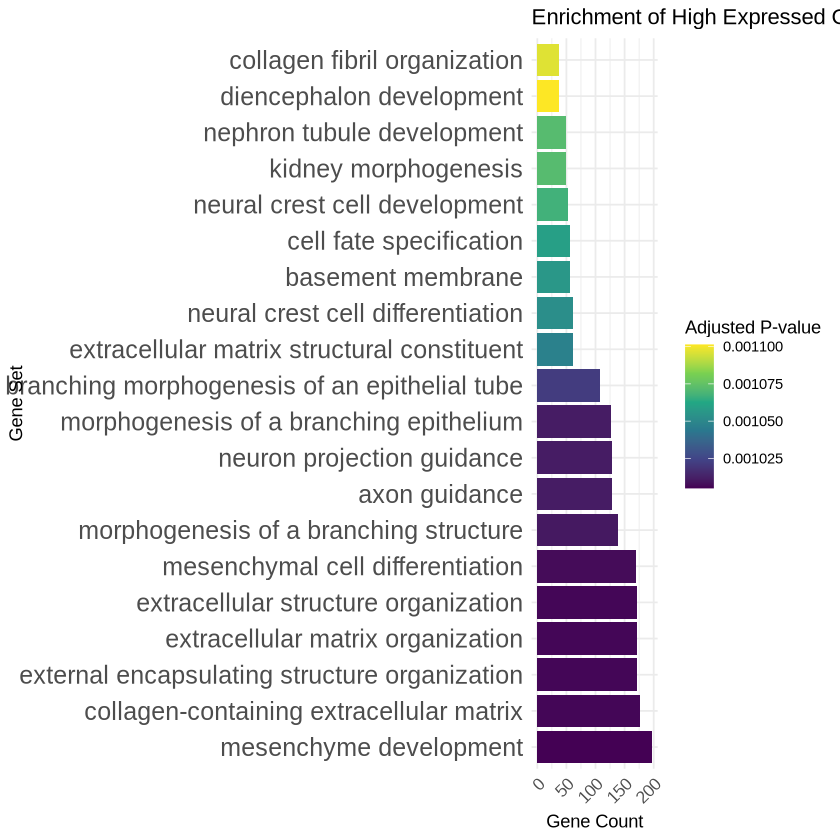

In [40]:
library(ggplot2)

# 提取 GSEA 结果数据
result_df <- as.data.frame(gsea_results@result)

# 选择要展示的前 20 个基因集
top_results <- head(result_df, 20)

# 绘制条形图
ggplot(top_results, aes(x = reorder(Description, -setSize), y = setSize, fill = pvalue)) +
    geom_bar(stat = "identity") +
    scale_fill_continuous(type = "viridis") + # 使用连续颜色表示 p 值
    coord_flip() + # 翻转坐标轴使条形图水平显示
    labs(title = "Enrichment of High Expressed Genes: sgCd44 ~ sgInter", x = "Gene Set", y = "Gene Count", fill = "Adjusted P-value") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),axis.text.y = element_text(angle = 0, hjust = 1, size = 15))


In [72]:
head(gsea_results@result[order(gsea_results@result$NES, decreasing = TRUE),])

,ONTOLOGY,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0005604,CC,GO:0005604,basement membrane,57,0.8180026,2.038403,0.001055966,0.01199223,0.008908821,1422,"tags=68%, list=11%, signal=61%",210530/57764/12836/18208/16782/13640/69675/12830/18858/20692/11504/94352/15530/18073/21857/21923/12831/12827/16777/12822/12361/14268/12826/58859/21858/22041/56401/16776/14873/16403/114249/12476/22339/226519/13138/14114/11603/17181/665700
GO:0007411,BP,GO:0007411,axon guidance,128,0.7673133,2.031964,0.001011122,0.01199223,0.008908821,1490,"tags=52%, list=12%, signal=47%",14365/14633/12064/68810/18845/20346/18028/18208/20356/18007/18844/16392/70433/14009/13640/13636/15228/399558/18187/13866/20563/18508/22772/22152/269878/75847/12168/13838/18612/58235/107449/14634/20349/319757/16971/11735/13642/235472/20359/140570/107515/14042/13800/20360/12569/20353/16776/19274/235611/11787/22339/17967/76260/18846/13641/73710/13138/20187/52666/18186/11603/232906/17181/17260/20350/20352/108699
GO:0097485,BP,GO:0097485,neuron projection guidance,128,0.7673133,2.031964,0.001011122,0.01199223,0.008908821,1490,"tags=52%, list=12%, signal=47%",14365/14633/12064/68810/18845/20346/18028/18208/20356/18007/18844/16392/70433/14009/13640/13636/15228/399558/18187/13866/20563/18508/22772/22152/269878/75847/12168/13838/18612/58235/107449/14634/20349/319757/16971/11735/13642/235472/20359/140570/107515/14042/13800/20360/12569/20353/16776/19274/235611/11787/22339/17967/76260/18846/13641/73710/13138/20187/52666/18186/11603/232906/17181/17260/20350/20352/108699
GO:0005201,MF,GO:0005201,extracellular matrix structural constituent,62,0.8003782,2.019189,0.001047120,0.01199223,0.008908821,1442,"tags=69%, list=11%, signal=62%",12835/12825/12836/107581/18208/14119/53867/16782/268977/69675/12830/20692/15530/13003/18073/20563/21923/12831/12827/16777/21825/94242/12822/76477/14268/12826/108075/58859/16012/13601/17304/330790/81877/12833/16776/114249/94214/226519/14114/11603/17181/665700/12842
GO:0062023,CC,GO:0062023,collagen-containing extracellular matrix,177,0.7512306,2.014994,0.001006036,0.01199223,0.008908821,1442,"tags=51%, list=11%, signal=46%",210530/11601/66548/12835/57764/12825/18845/12836/107581/18208/14119/53867/16782/67573/13640/268977/69675/12830/18858/18787/20197/20692/11504/240913/94352/16007/14066/21827/15530/13003/18073/21857/20563/21923/12831/12827/269855/16777/13039/21825/12406/94242/12822/12361/76477/14268/140792/12826/108075/58859/16012/18828/13601/26360/12153/56213/17304/21858/22041/330790/16998/11745/109901/81877/18133/140570/16950/12833/56401/71738/16776/14873/16403/114249/12476/94214/109246/22339/17395/226519/13138/14114/16952/11603/57875/224224/229595/17181/665700/12842
GO:0021536,BP,GO:0021536,diencephalon development,38,0.8447504,2.009173,0.001101322,0.01199223,0.008908821,1312,"tags=61%, list=10%, signal=54%",14633/21416/12156/15114/20674/20346/15205/20356/18844/15364/16392/18187/68169/18508/14461/24136/20349/18740/319757/12166/17967/18846/18186


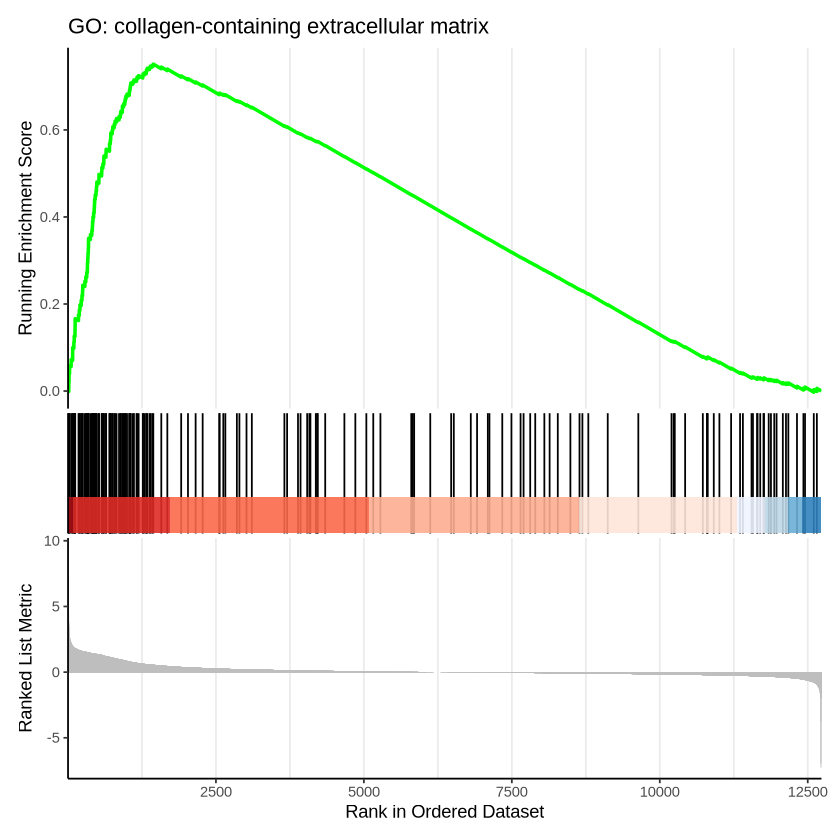

In [73]:
set_name <- 'GO:0062023'
gseaplot2(gsea_results, geneSetID = set_name, 
          title = paste('GO:', gsea_results@result[gsea_results@result$ID == set_name,'Description'], sep=' '))

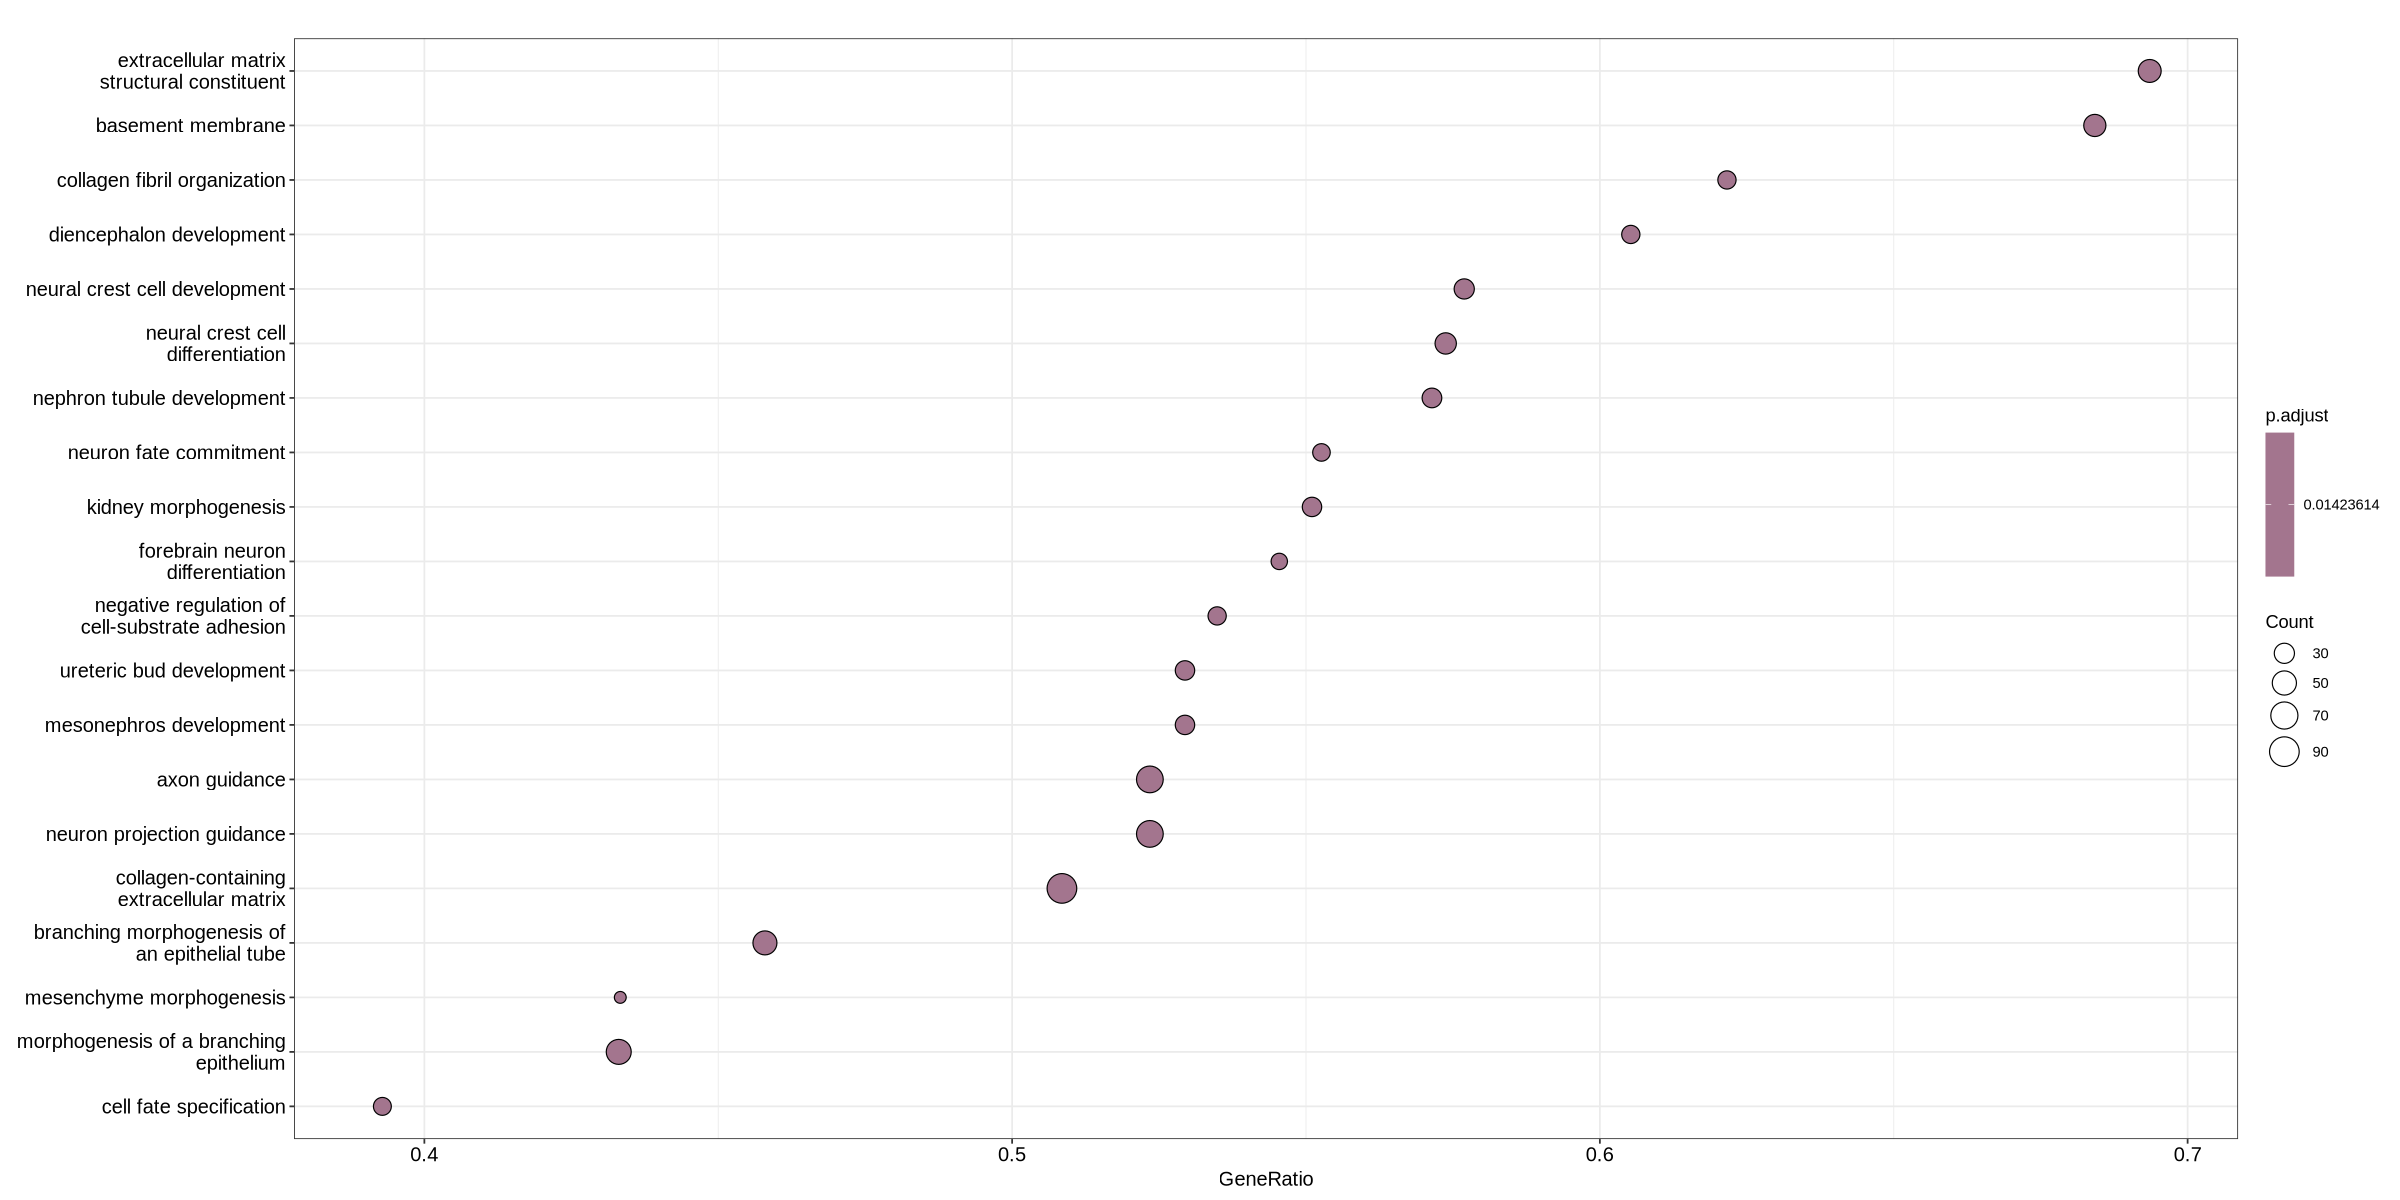

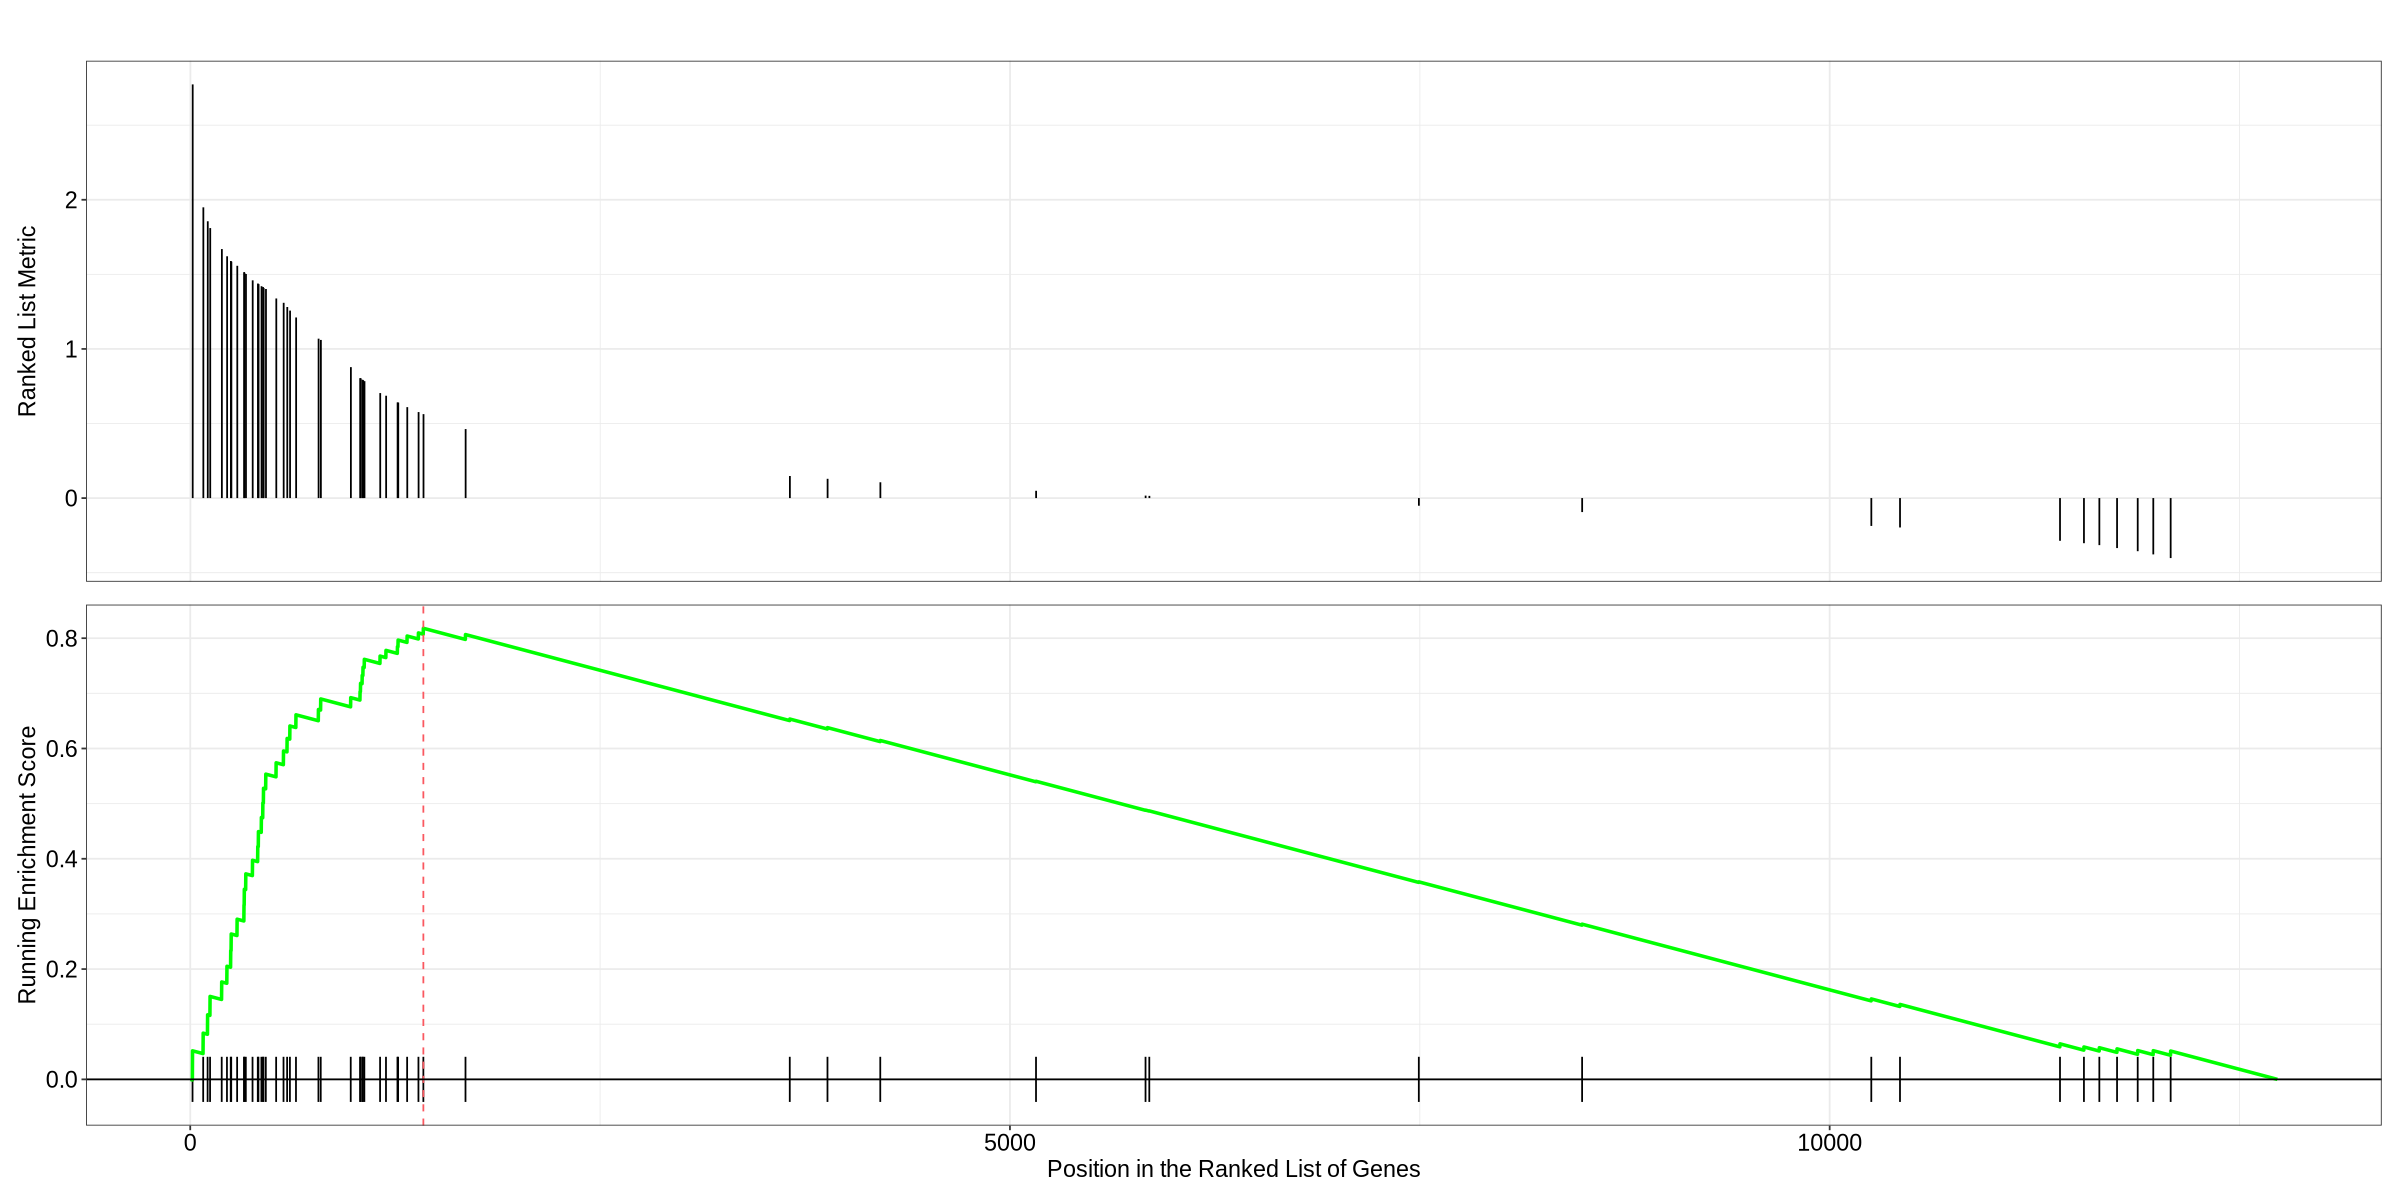

In [12]:
dotplot(gsea_results, showCategory=20)
gseaplot(gsea_results, geneSetID = gsea_results@result$ID[1])

Saving 6.67 x 6.67 in image
Warning message:
“ggrepel: 347 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 347 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


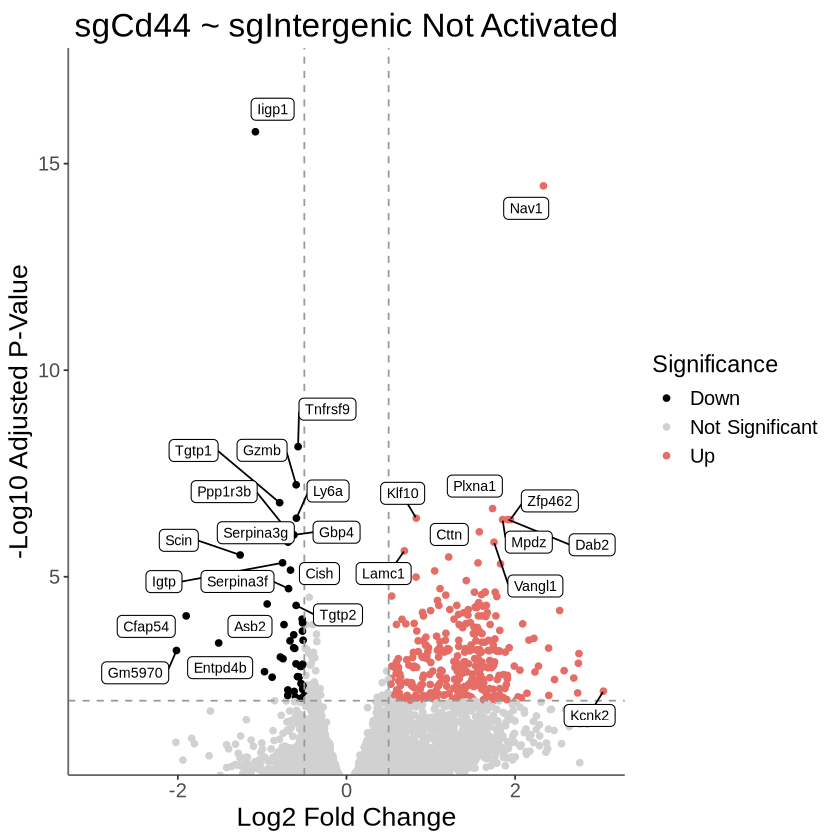

In [79]:
library(ggplot2)
library(ggrepel)

tab <- df

# Assign colors based on fold change and significance
tab$color <- 'Not Significant'
tab$color[tab$log2FoldChange > 0.5 & tab$padj < 0.01] <- 'Up'
tab$color[tab$log2FoldChange < -0.5 & tab$padj < 0.01] <- 'Down'
tab$color <- factor(tab$color, levels = c('Down', 'Not Significant', 'Up'))

# Create the plot with soft colors and labeled genes
p <- ggplot(tab, aes(x = log2FoldChange, y = -log10(padj))) +
  geom_point(aes(color = color), size = 1.5) +
  scale_color_manual(values = c("#000000", "#D1D1D1", "#E66D65")) +  # Softer colors
  theme_classic() +
  labs(
    title = "sgCd44 ~ sgIntergenic Not Activated",
    x = "Log2 Fold Change",
    y = "-Log10 Adjusted P-Value",
    color = 'Significance'
  ) +
  coord_cartesian(xlim = c(-3, 3), ylim = c(1, 17)) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "gray60") +
  geom_vline(xintercept = c(-0.5, 0.5), linetype = "dashed", color = "gray60") +
  geom_label_repel(
    data = subset(tab, (padj < 0.01) & (abs(log2FoldChange) > 0.5)),
    aes(label = Gene_name),
    size = 3, fill = "white", box.padding = 0.4, label.size = 0.3, 
    label.r = unit(0.2, "lines"), # Rounded corners
    color = "black",
    max.overlaps = 20,  # 显示更多标签
  ) +
  theme(
    plot.title = element_text(size = 20, hjust = 0.5, vjust = 0.3),  # Title size
    axis.title = element_text(size = 16),  # Axis title size
    axis.text = element_text(size = 12),   # Axis label size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),  # Legend text size
    axis.line = element_line(size = 0.5, color = "gray40"), # Softer axis lines
    panel.grid.major = element_blank(), panel.grid.minor = element_blank() # Clean gridlines
  )

# Save the plot
ggsave('co-culture_updated.pdf', p, dpi=600)

print(p)

In [88]:
tab[tab$color != 'Not Significant', ] %>% write.table('gene_list.csv', sep='\t', quote = FALSE)